In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lungsdata/lung cancer dataset (updated).csv


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Loading Data

In [152]:
data = pd.read_csv('/kaggle/input/lungsdata/lung cancer dataset (updated).csv')


# Exploratory Data Analysis and Preprocessing

In [153]:
print("\nInitial Data Info:\n")
print(data.info())



Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                1000 non-null   object 
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Air Pollution             1000 non-null   int64  
 4   Alcohol use               936 non-null    float64
 5   Dust Allergy              1000 non-null   int64  
 6   OccuPational Hazards      950 non-null    float64
 7   Genetic Risk              1000 non-null   int64  
 8   chronic Lung Disease      1000 non-null   int64  
 9   Balanced Diet             1000 non-null   int64  
 10  Obesity                   936 non-null    float64
 11  Smoking                   944 non-null    float64
 12  Smoking.1                 944 non-null    float64
 13  Passive Smoker            1000 non-null   i

In [154]:

print("\nMissing Values:\n", data.isnull().sum())




Missing Values:
 Patient Id                   0
Age                          0
Gender                       0
Air Pollution                0
Alcohol use                 64
Dust Allergy                 0
OccuPational Hazards        50
Genetic Risk                 0
chronic Lung Disease         0
Balanced Diet                0
Obesity                     64
Smoking                     56
Smoking.1                   56
Passive Smoker               0
Chest Pain                   0
Coughing of Blood            0
Fatigue                      0
Weight Loss                 72
Shortness of Breath          0
Wheezing                     0
Swallowing Difficulty        0
Swallowing Difficulty.1      0
Clubbing of Finger Nails     0
Frequent Cold                0
Dry Cough                    0
Snoring                      0
Level                        0
Result                       0
dtype: int64


In [155]:
print("\nDescribe Data:\n", data.describe())


Describe Data:
                Age  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000      1000.0000   936.000000   1000.000000   
mean     37.174000         3.8400     4.541667      5.165000   
std      12.005493         2.0304     2.626963      1.980833   
min      14.000000         1.0000     1.000000      1.000000   
25%      27.750000         2.0000     2.000000      4.000000   
50%      36.000000         3.0000     5.000000      6.000000   
75%      45.000000         6.0000     7.000000      7.000000   
max      73.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count            950.000000   1000.000000           1000.000000   
mean               4.843158      4.580000              4.380000   
std                2.104146      2.126999              1.848518   
min                1.000000      1.000000              1.000000   
25%                3.000000      2.000000              3.000000   
50% 

In [156]:
#filling missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [157]:
print("\nUnique Counts:\n", data.nunique())


Unique Counts:
 Patient Id                  1000
Age                           40
Gender                         2
Air Pollution                  8
Alcohol use                    9
Dust Allergy                   8
OccuPational Hazards           9
Genetic Risk                   7
chronic Lung Disease           7
Balanced Diet                  7
Obesity                        8
Smoking                        9
Smoking.1                      9
Passive Smoker                 8
Chest Pain                     9
Coughing of Blood              9
Fatigue                        8
Weight Loss                    9
Shortness of Breath            8
Wheezing                       8
Swallowing Difficulty          8
Swallowing Difficulty.1        8
Clubbing of Finger Nails       9
Frequent Cold                  7
Dry Cough                      7
Snoring                        7
Level                          3
Result                         2
dtype: int64


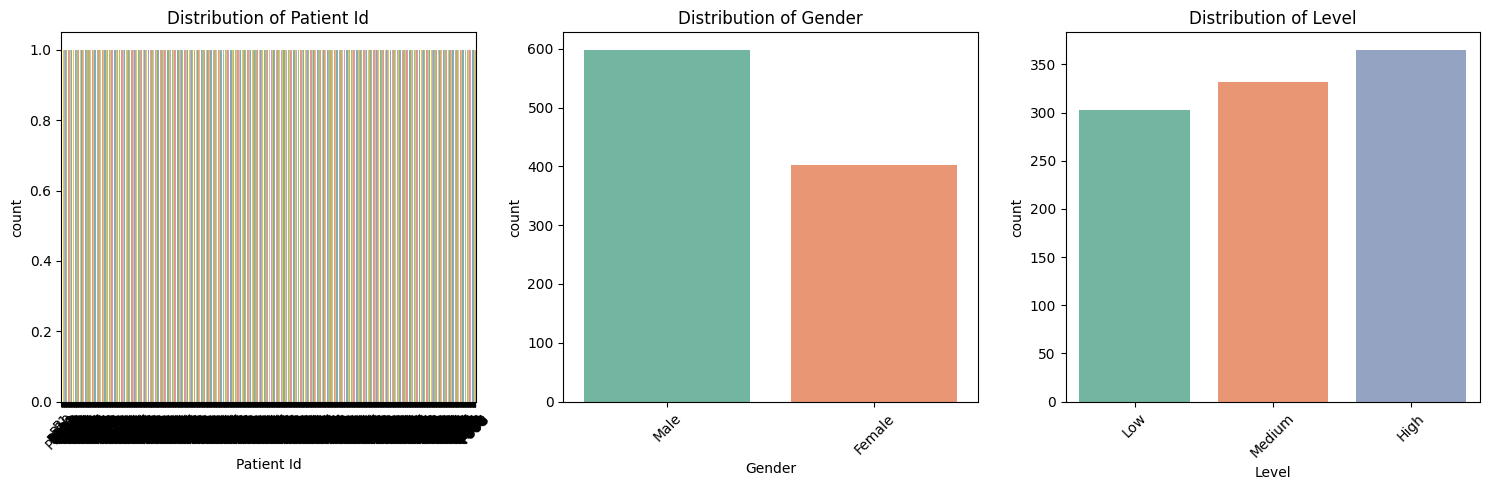

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Selecting categorical columns
categorical_cols = data.select_dtypes(include='object').columns
num_cols = len(categorical_cols)
cols = 3  # Number of columns in subplot grid
rows = math.ceil(num_cols / cols)  # Calculate the required number of rows

# Creating subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()  # Flatten axes array for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


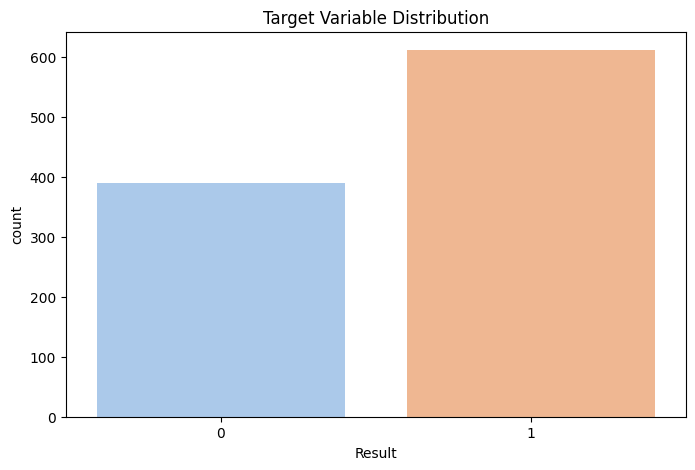

In [159]:
# Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Result', data=data, palette='pastel')
plt.title('Target Variable Distribution')
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

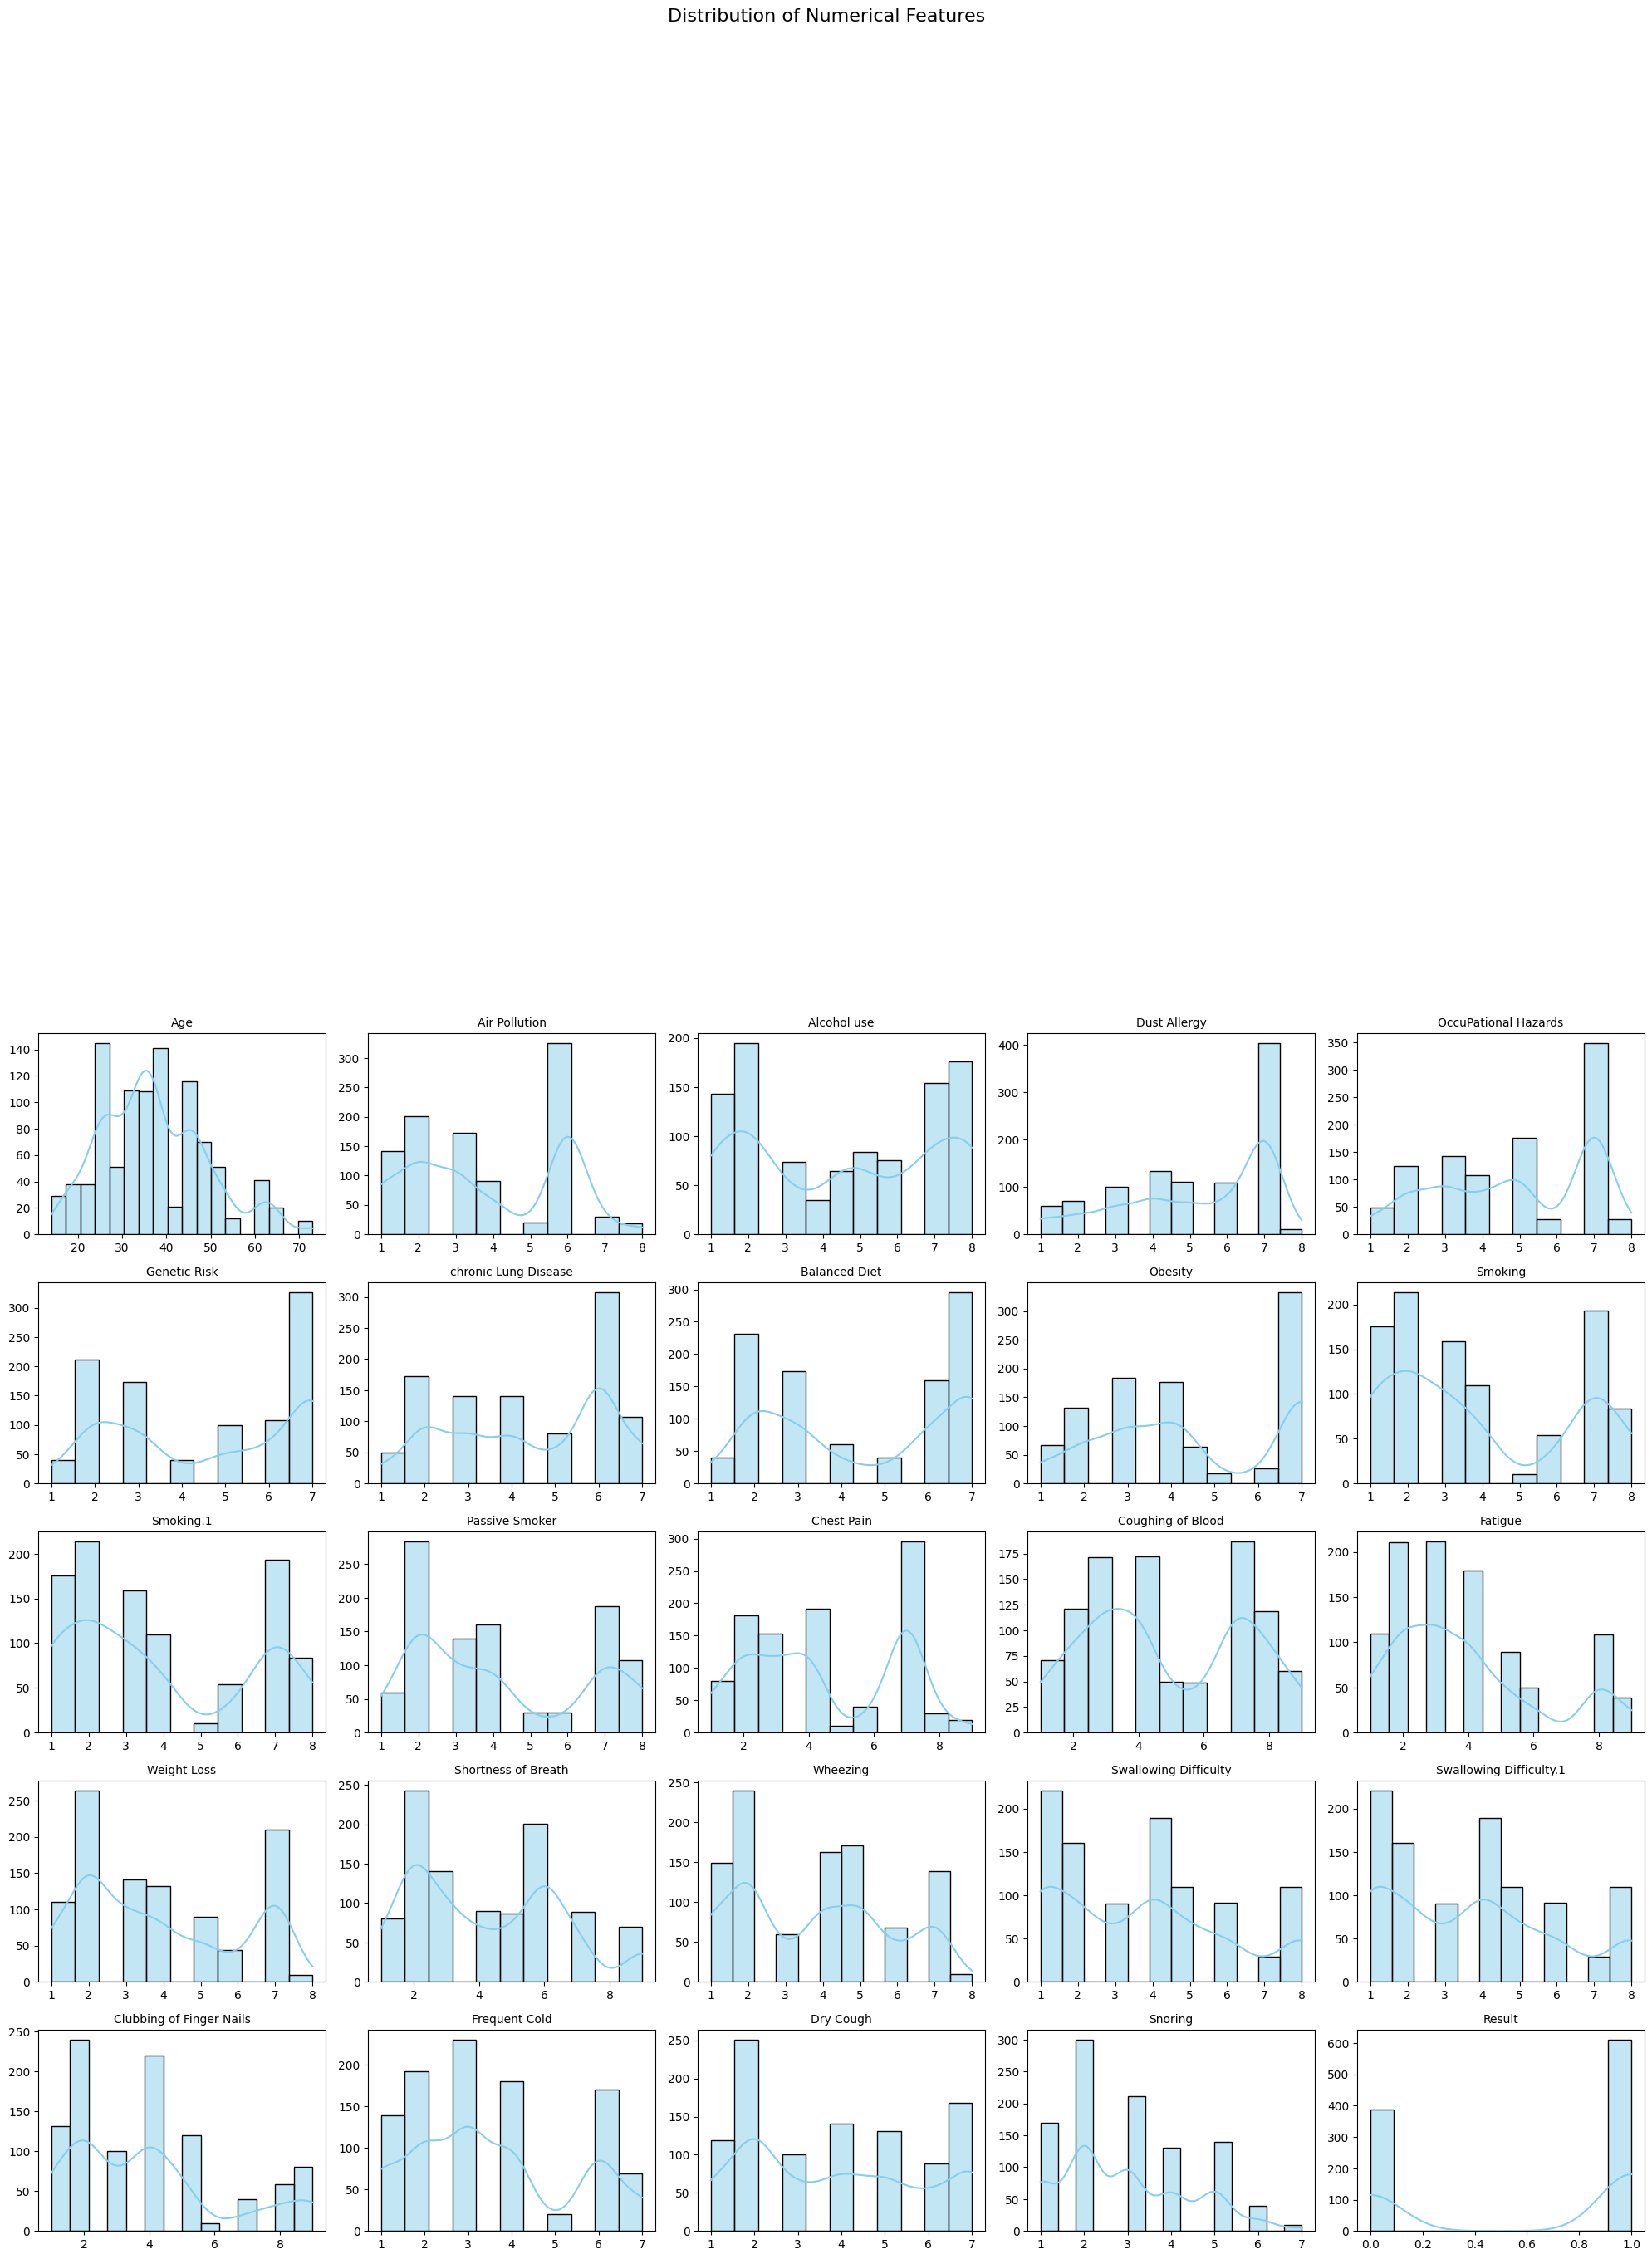

In [160]:
import math
numerical_cols=data.select_dtypes(include=[np.number])
n_cols = 5
n_total = len(numerical_cols)
n_rows = math.ceil(n_total / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()

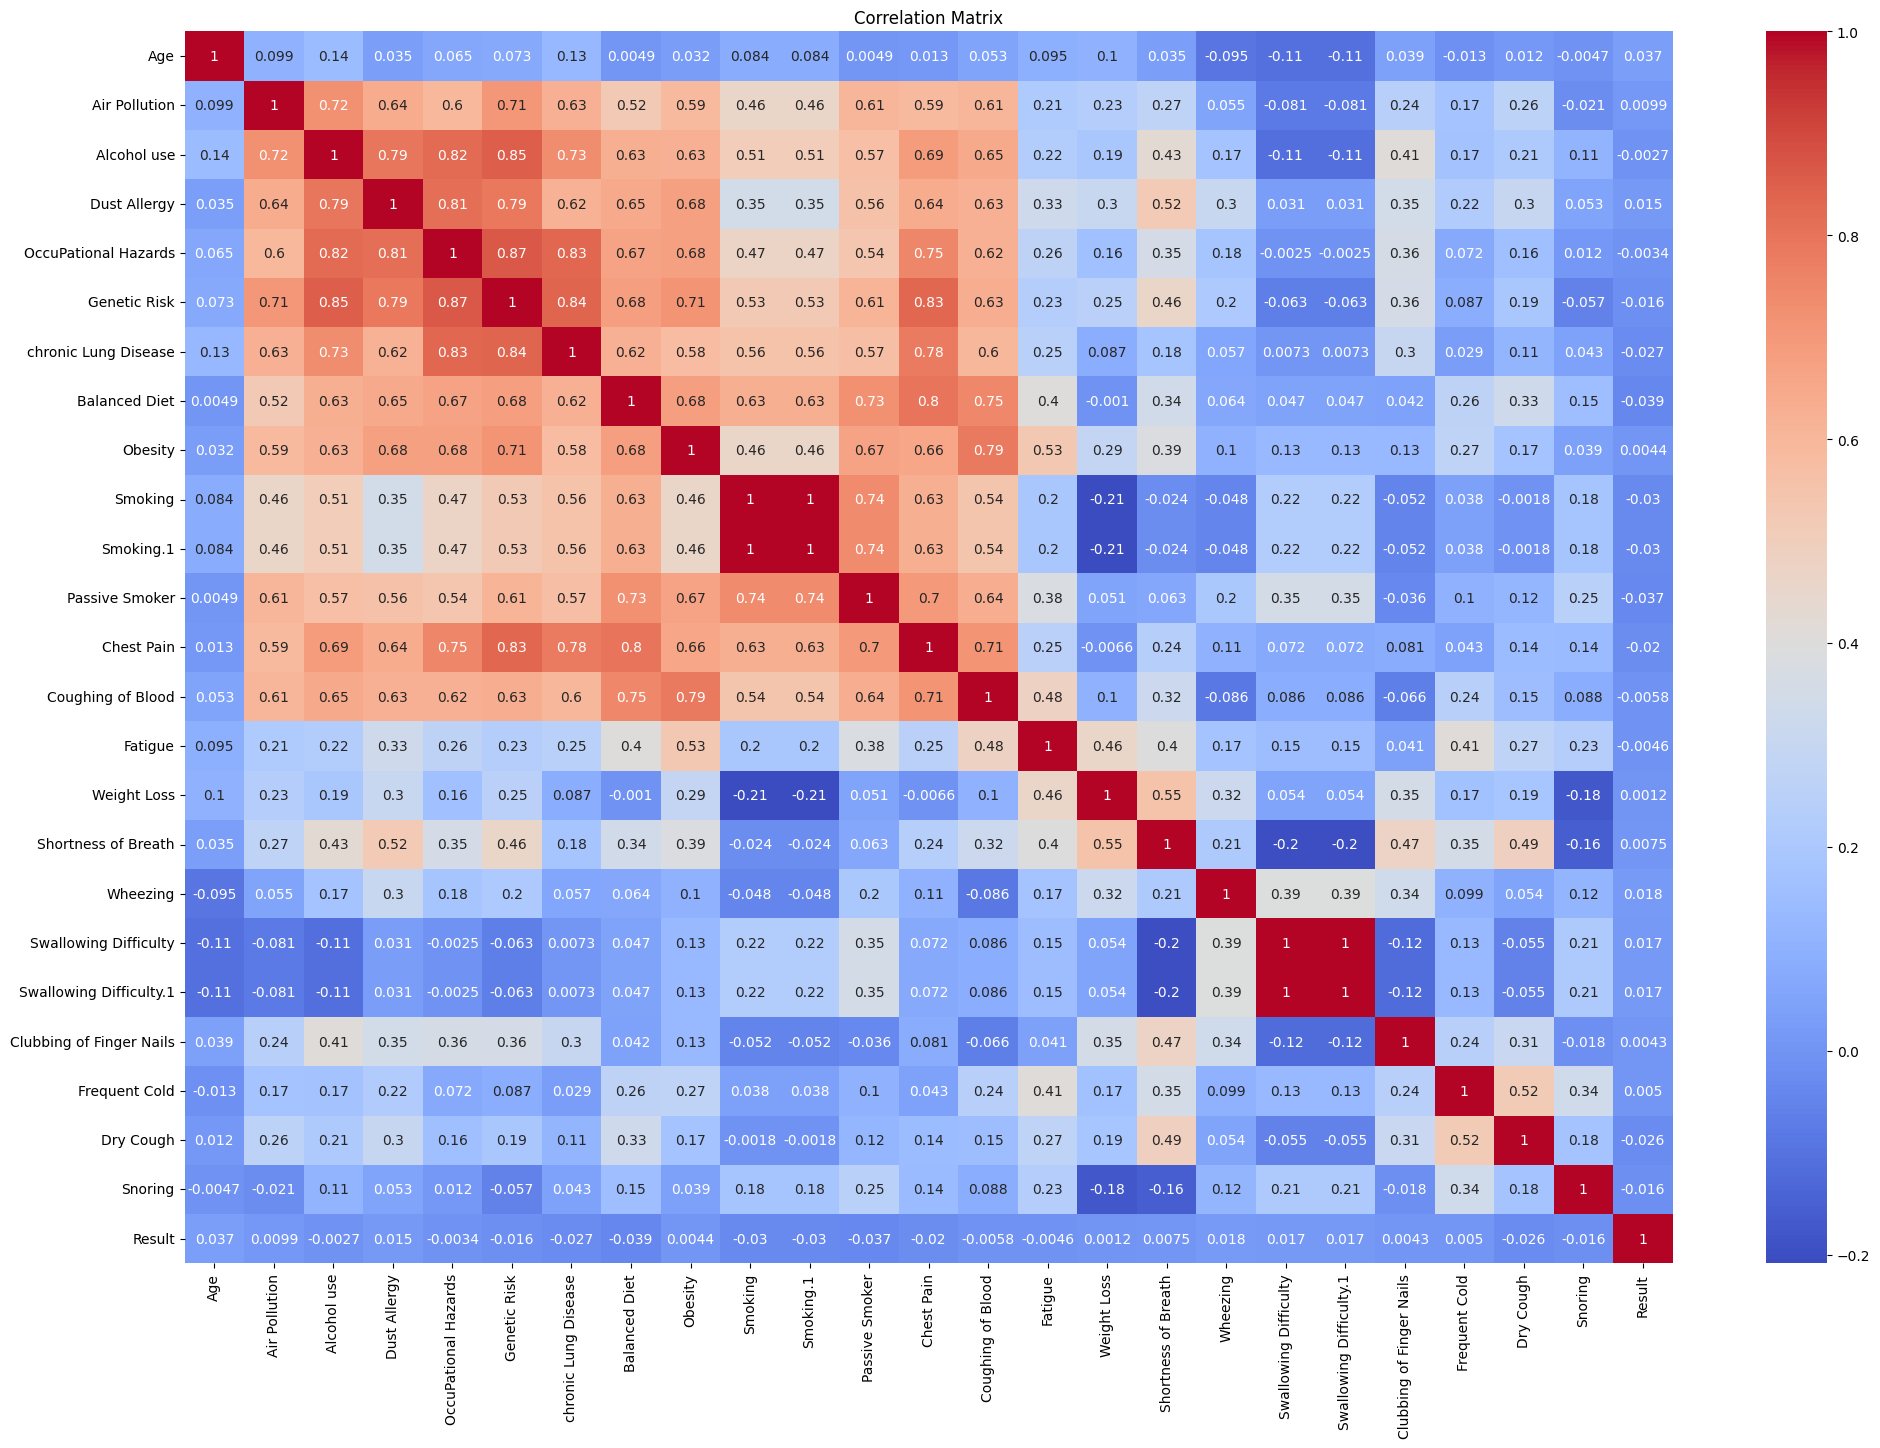

In [161]:
#Correlation Matrix (handling non-numeric data)
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(24, 16))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

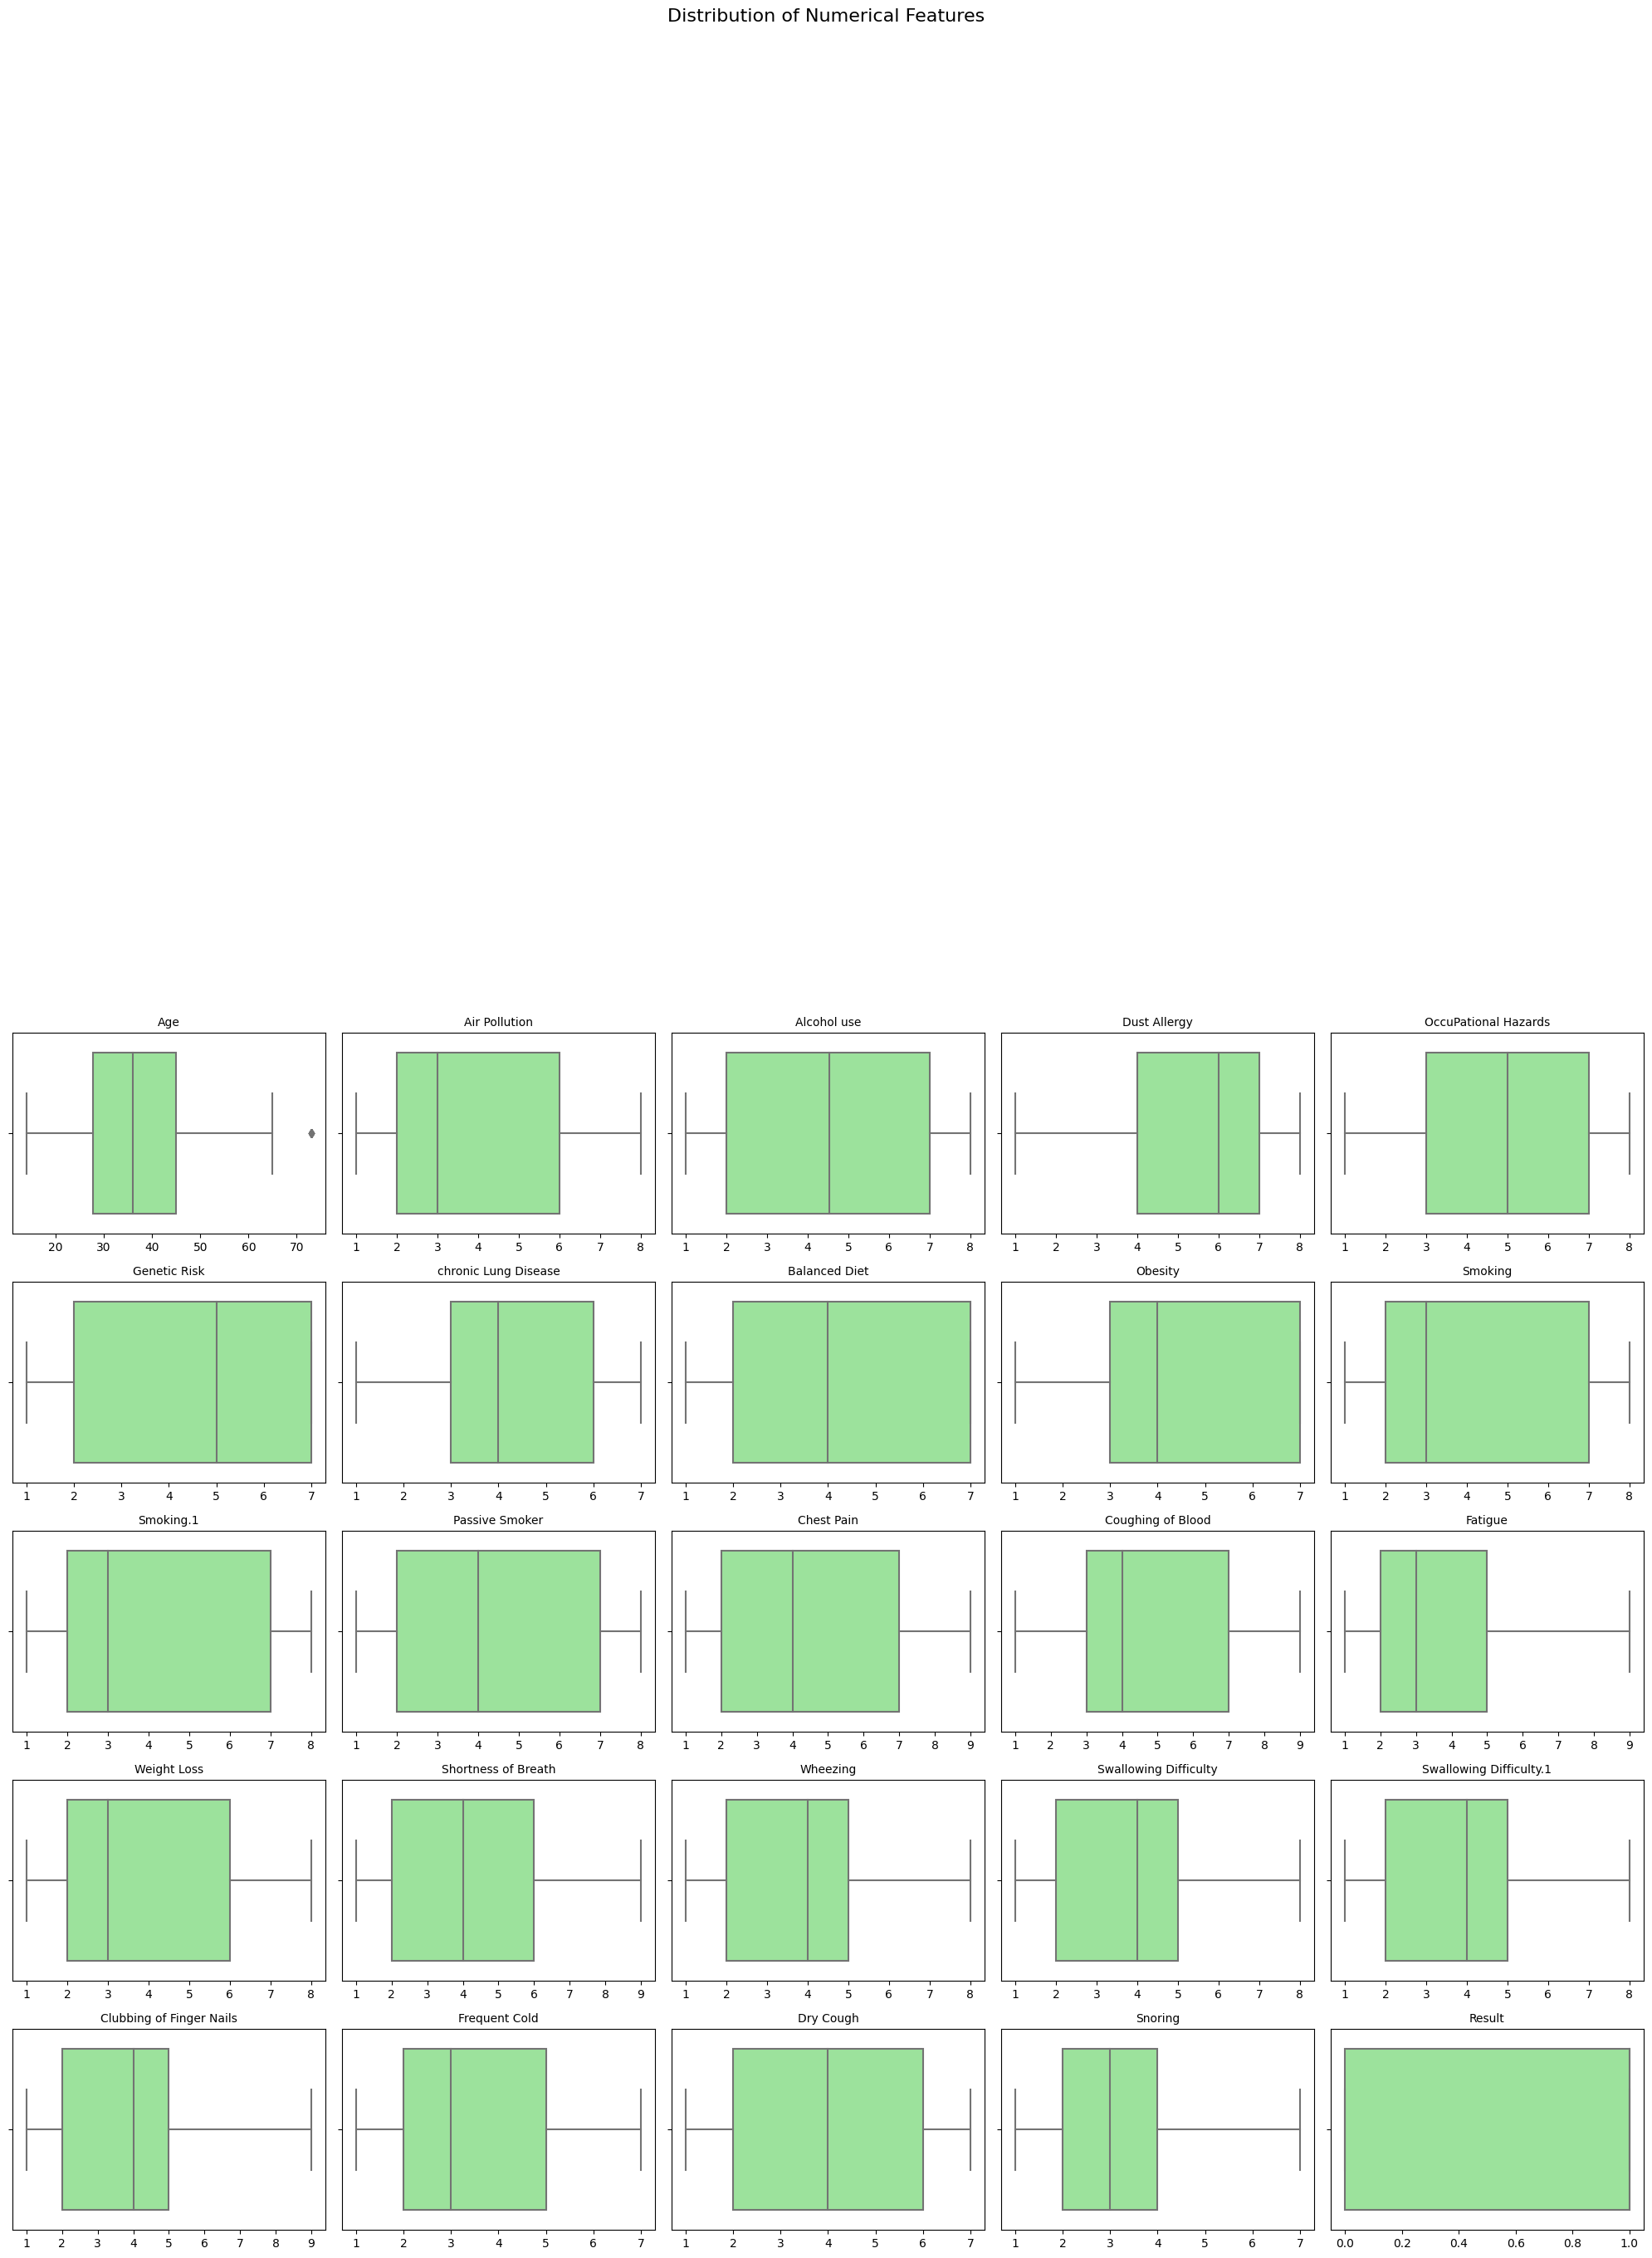

In [162]:
n_cols = 5
n_total = len(numerical_cols)
n_rows = math.ceil(n_total / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols):
    # sns.boxplot(data[col], kde=True, color='skyblue', ax=axes[i])
    sns.boxplot(x=data[col], color='lightgreen', ax = axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()

In [163]:
#Skewness and Kurtosis Analysis (before scaling)
from scipy.stats import skew, kurtosis
print("\nSkewness and Kurtosis Analysis (Before Scaling):\n")
for col in numerical_cols:
    skewness = skew(data[col].dropna())
    kurt = kurtosis(data[col].dropna())
    print(f"{col}: Skewness = {skewness}, Kurtosis = {kurt}")


Skewness and Kurtosis Analysis (Before Scaling):

Age: Skewness = 0.5502689405577516, Kurtosis = 0.05324893367768002
Air Pollution: Skewness = 0.12526335148521658, Kurtosis = -1.385918309869359
Alcohol use: Skewness = -0.0013950311069472678, Kurtosis = -1.5059716607745117
Dust Allergy: Skewness = -0.6437417290904728, Kurtosis = -0.8629380650517042
OccuPational Hazards: Skewness = -0.24782223145503046, Kurtosis = -1.2695269622040173
Genetic Risk: Skewness = -0.12647464789970553, Kurtosis = -1.5947971401094003
chronic Lung Disease: Skewness = -0.22013452096427485, Kurtosis = -1.3037410594185663
Balanced Diet: Skewness = -0.06439860160806354, Kurtosis = -1.6389381584712575
Obesity: Skewness = 0.04091023317335445, Kurtosis = -1.373203806380186
Smoking: Skewness = 0.41487003823397817, Kurtosis = -1.3432902593819775
Smoking.1: Skewness = 0.41487003823397817, Kurtosis = -1.3432902593819775
Passive Smoker: Skewness = 0.41084137671227167, Kurtosis = -1.327423838807136
Chest Pain: Skewness = 0.

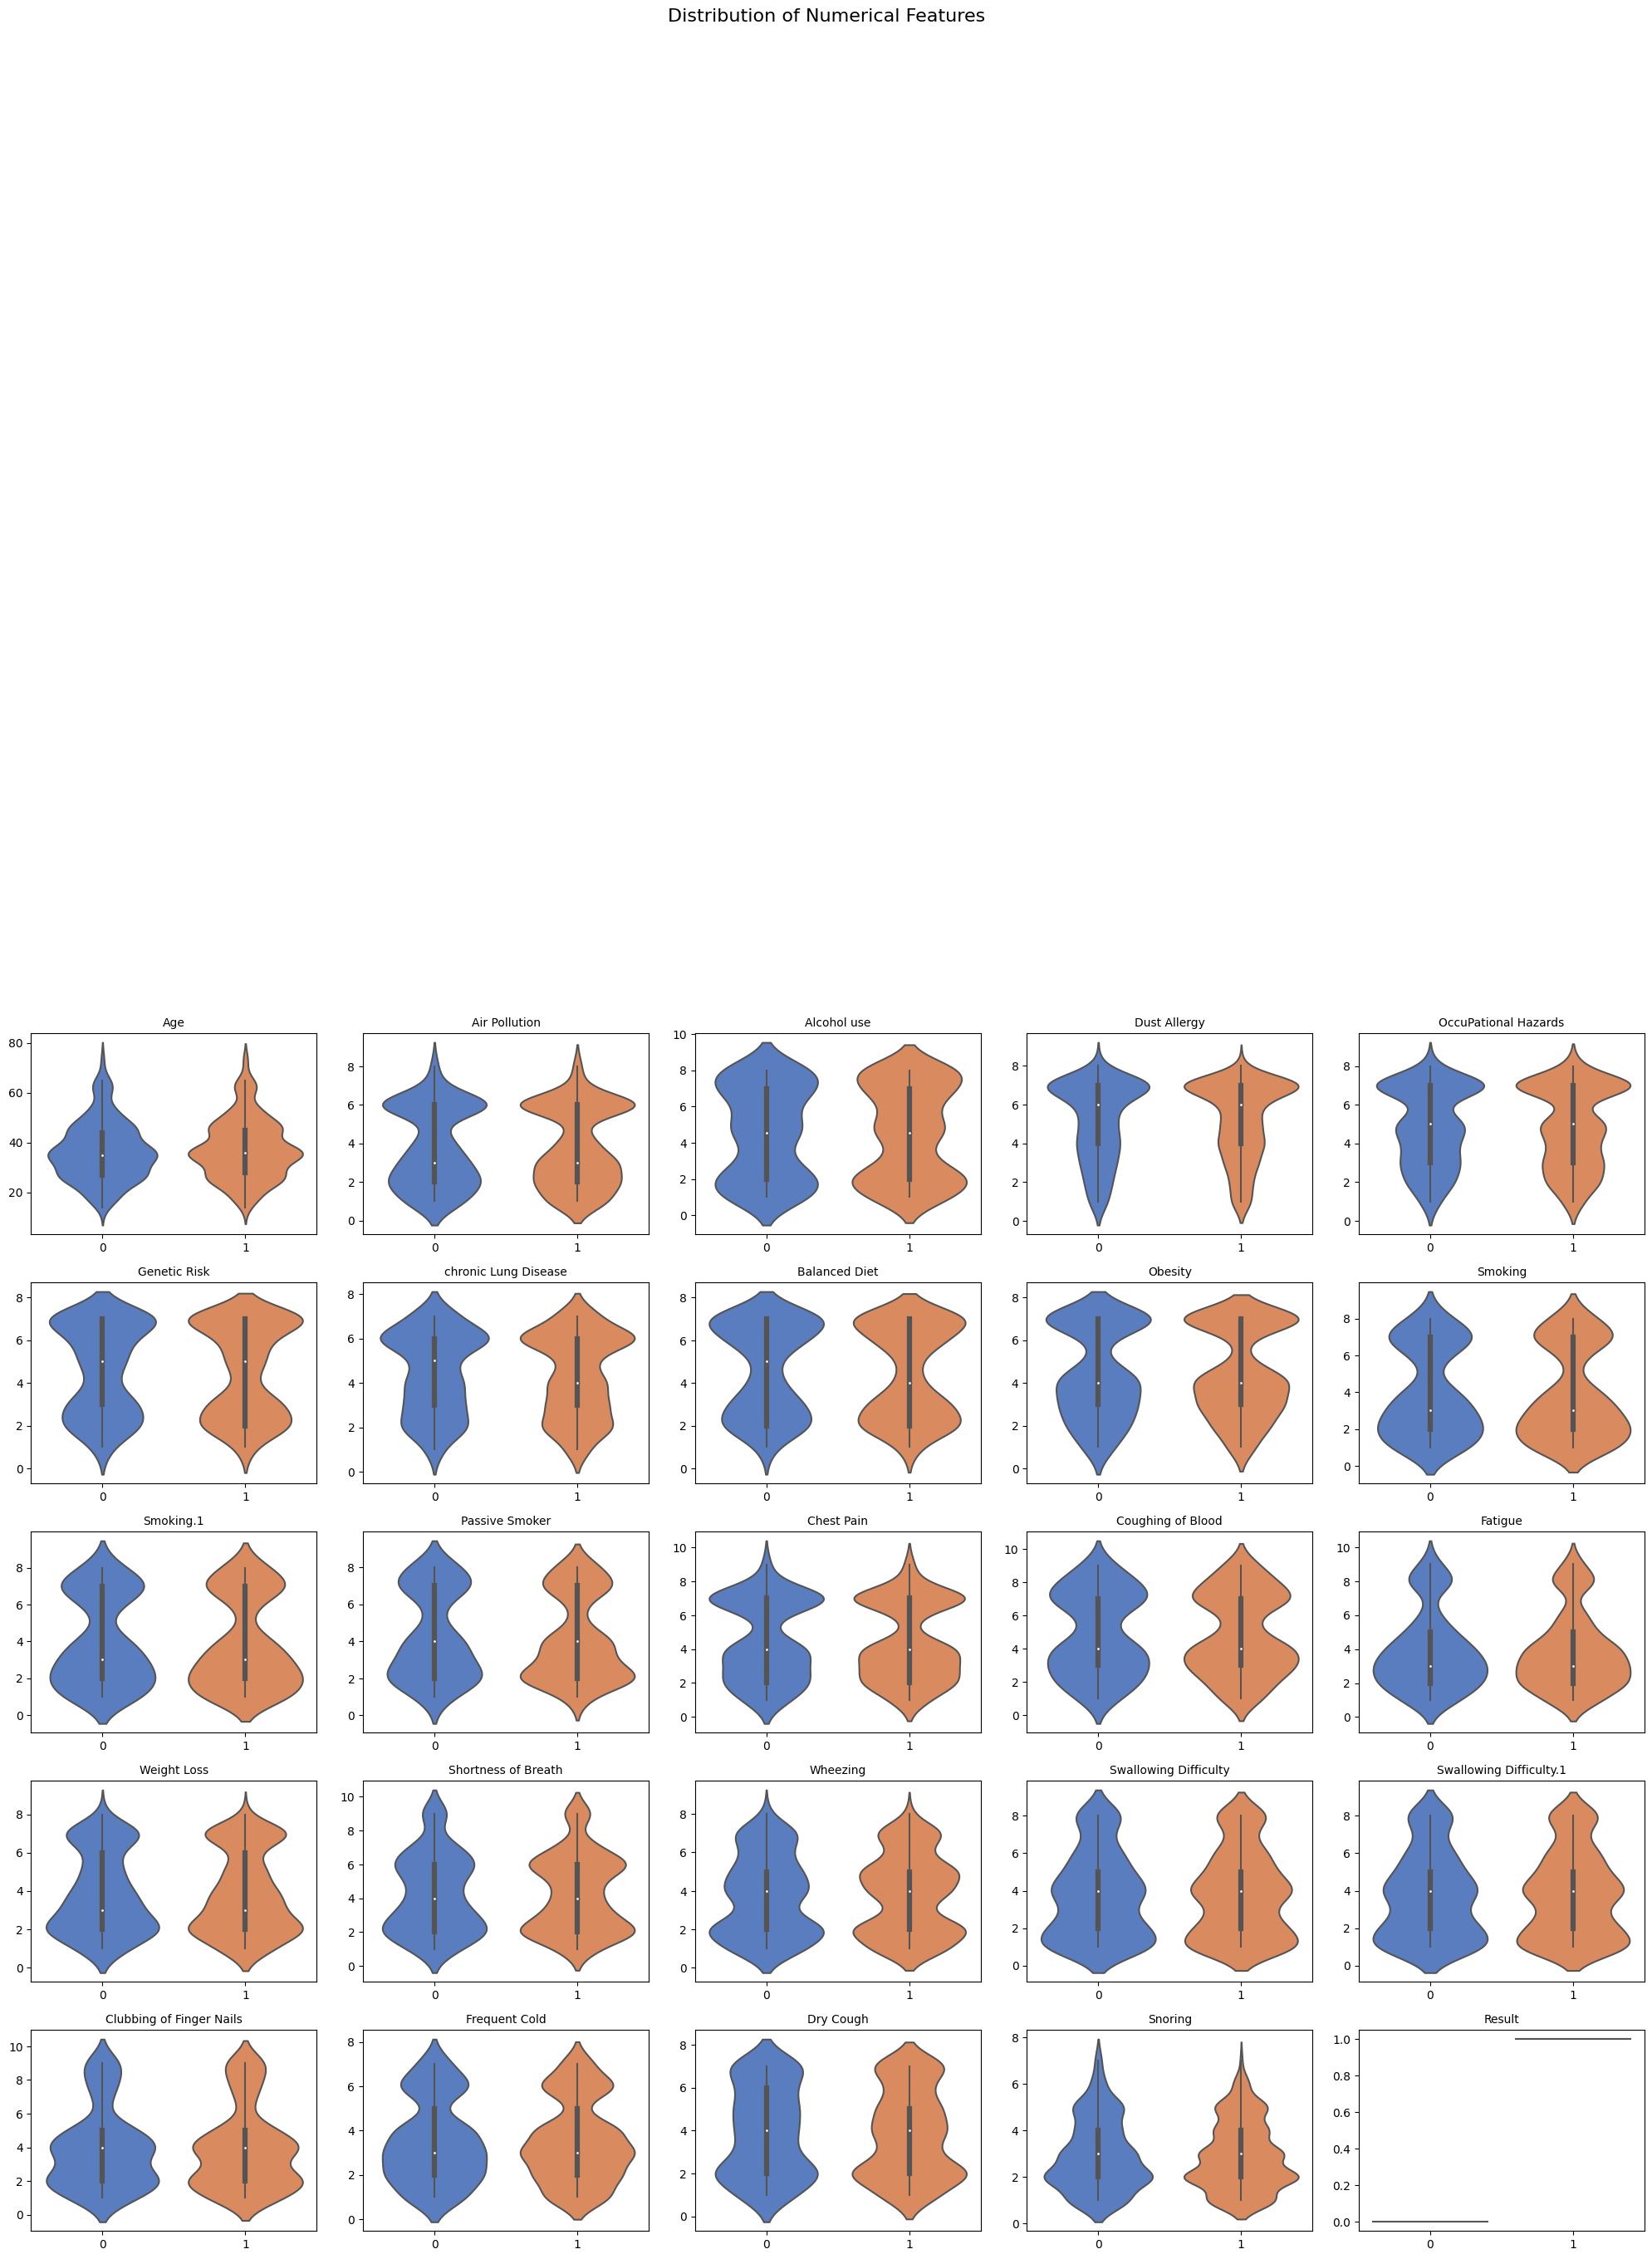

In [164]:
n_cols = 5
n_total = len(numerical_cols)
n_rows = math.ceil(n_total / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

# Plot histograms
for i, col in enumerate(numerical_cols):
    sns.violinplot(x='Result', y=col, data=data, palette='muted', ax = axes[i])
    # sns.boxplot(x=data[col], color='lightgreen', ax = axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()

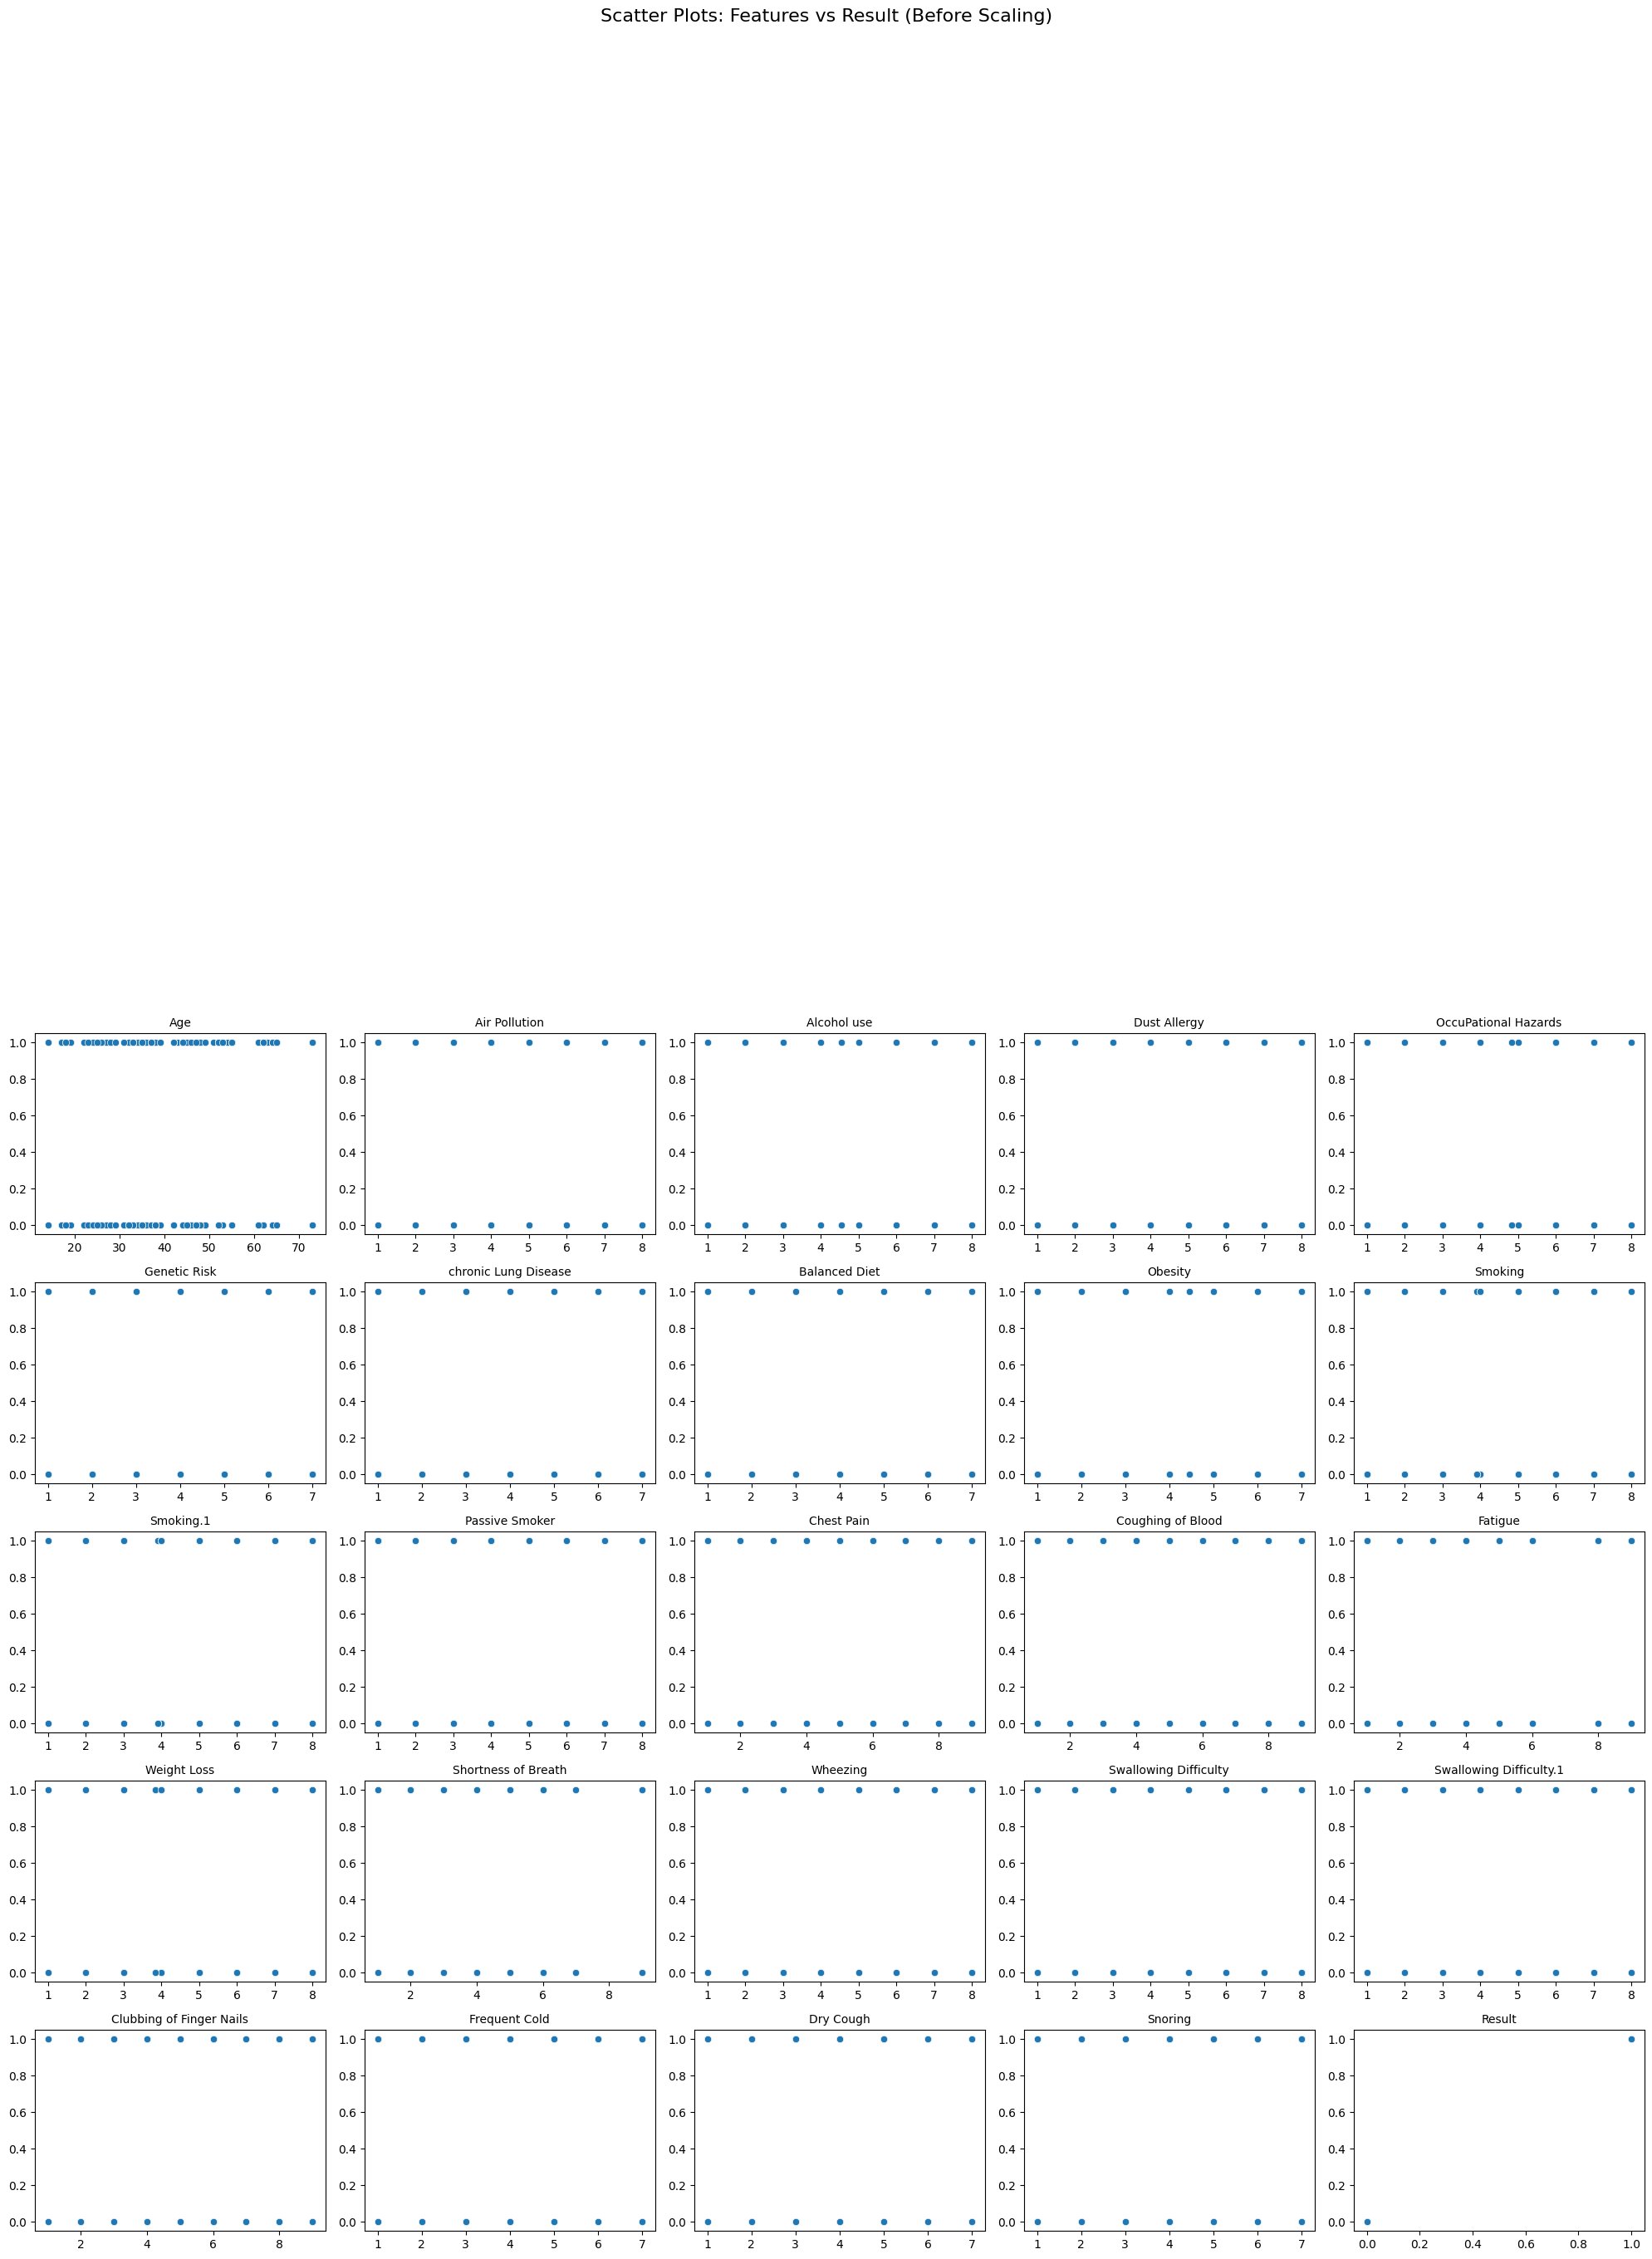

In [165]:

n_cols = 5
n_total = len(numerical_cols)
n_rows = math.ceil(n_total / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
axes = axes.flatten()

# Plot scatter plots
for i, col in enumerate(numerical_cols):
    sns.scatterplot(x=col, y='Result', data=data, ax=axes[i])
    axes[i].set_title(f'{col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Scatter Plots: Features vs Result (Before Scaling)', fontsize=16, y=1.02)
plt.show()

In [166]:
#Encoding Data
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])



In [167]:
#Removing Outliers
from scipy import stats
z_scores = np.abs(stats.zscore(data))
data = data[(z_scores < 3).all(axis=1)]

In [168]:
# Data Transformation
scaler = StandardScaler()

X = scaler.fit_transform(data.drop('Result', axis=1))
y = data['Result']


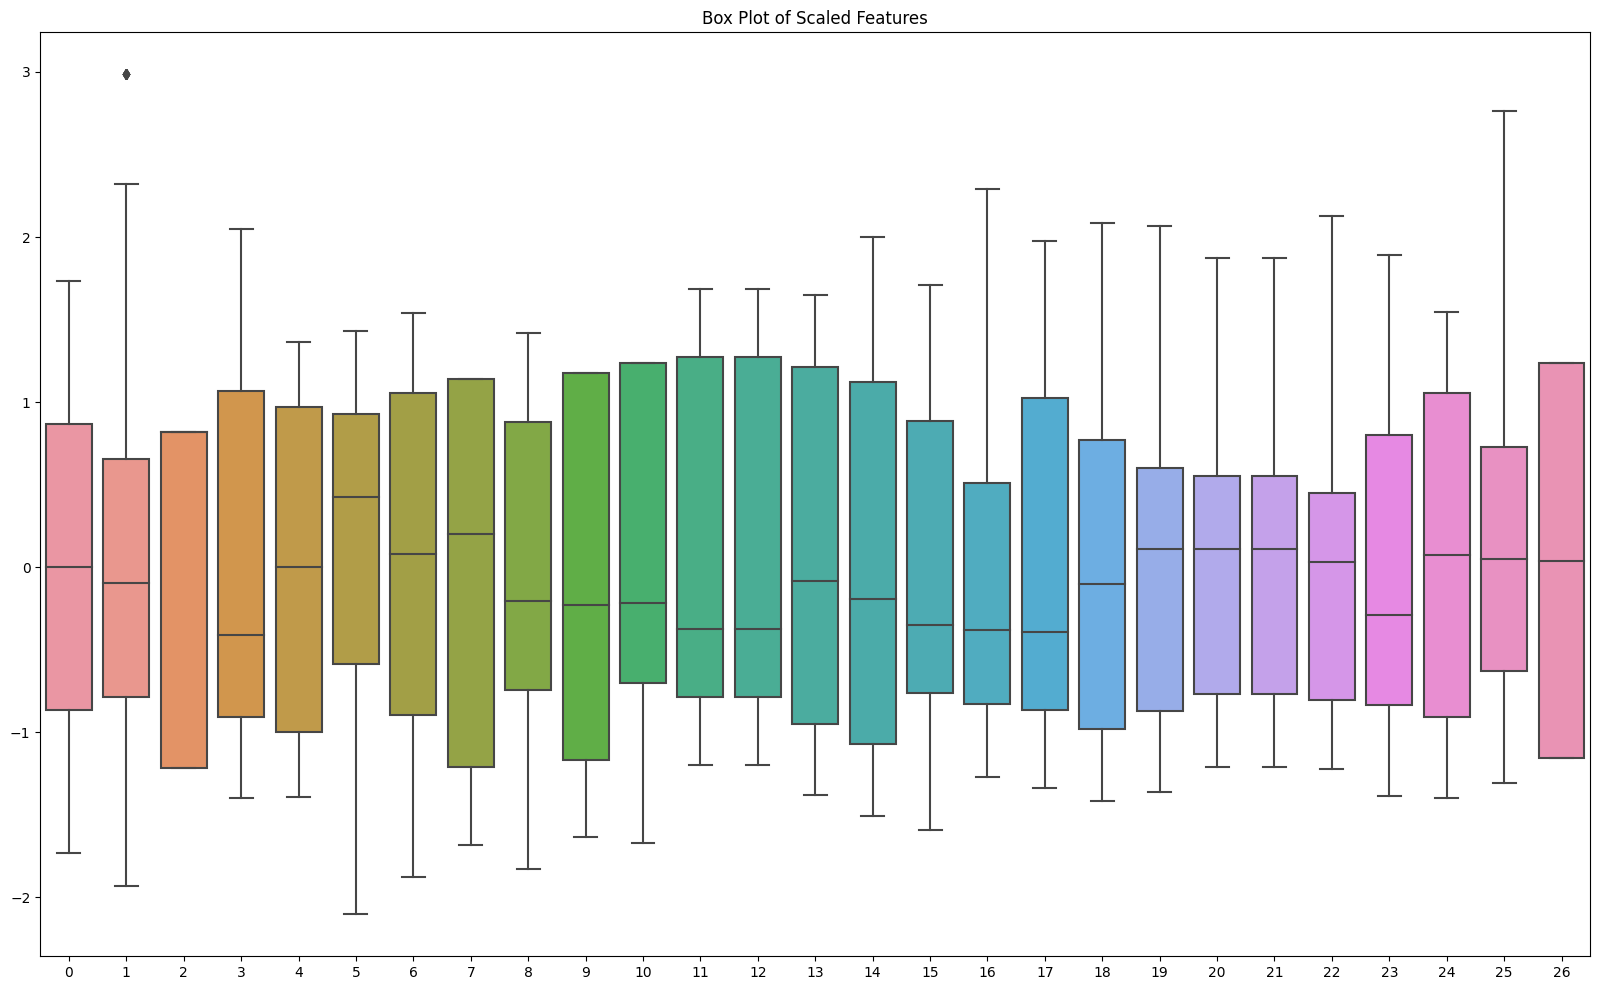

In [169]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=pd.DataFrame(X))
plt.title('Box Plot of Scaled Features')
plt.show()

# Spliting the Data

In [170]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [171]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import joblib

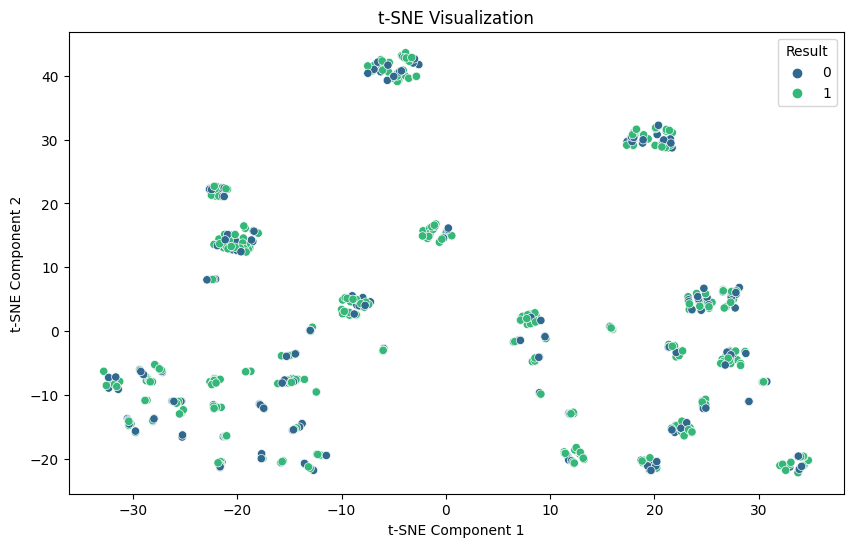

In [172]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_train, palette='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Model Training

In [173]:
models = {
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

param_grid = {
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [5, 10]},
    'XGBoost': {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
}

best_model = None
best_accuracy = 0
model_accuracies = {}

for name, model in models.items():
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    
    val_predictions = grid.best_estimator_.predict(X_val)
    accuracy = accuracy_score(y_val, val_predictions)
    model_accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = grid.best_estimator_


SVM Accuracy: 0.5866666666666667
RandomForest Accuracy: 0.6933333333333334
XGBoost Accuracy: 0.94


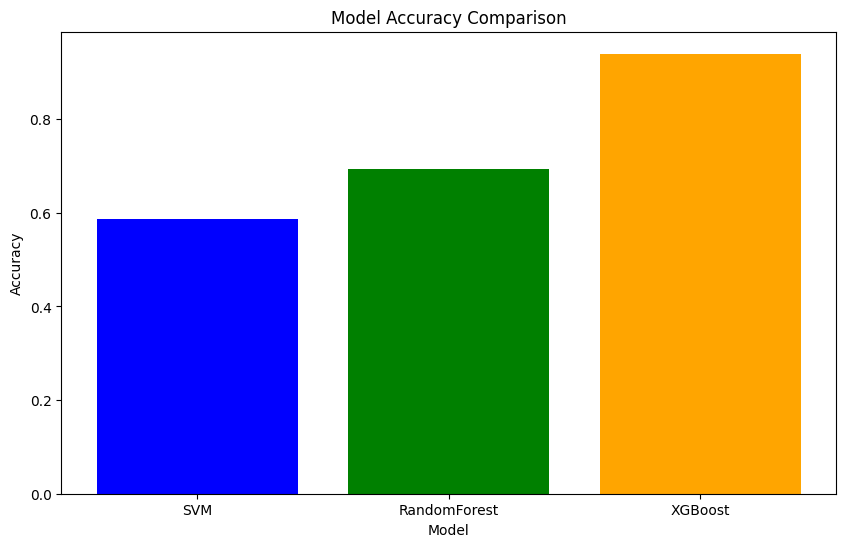

In [174]:
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

# Saving the model

In [175]:
joblib.dump(best_model, 'best_model.pkl')
print(f"Best Model Saved: {best_model}")


Best Model Saved: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# Evalution of Model

In [176]:
best_model = joblib.load('best_model.pkl')
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))







Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        60
           1       1.00      0.93      0.97        90

    accuracy                           0.96       150
   macro avg       0.95      0.97      0.96       150
weighted avg       0.96      0.96      0.96       150



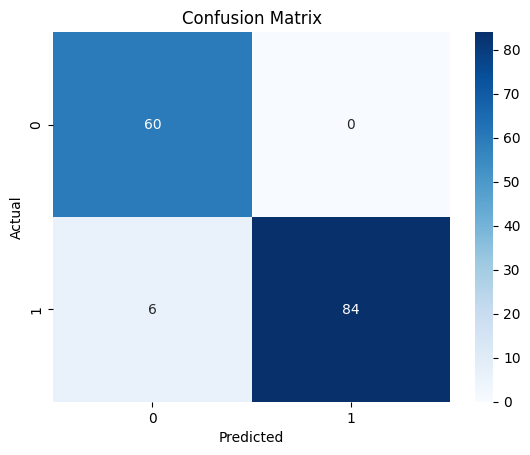

In [177]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [178]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Test Accuracy: 0.96
